In [1]:
import uproot
import numpy as np
import math
from matplotlib import pylab as plt
from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
from root_pandas import read_root
from matplotlib import rc
from matplotlib import colors as mplcol

# plt.rcParams['text.usetex'] = True


def midpoints(hvals):
    hvals_shift=np.append(hvals[1:],0)

    midp=(hvals+hvals_shift)/2.0
    return midp[:-1]

font = {'family': 'sanserif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Welcome to JupyROOT 6.22/02


## Inspect what variables are inside the file

In [2]:
file = uproot.open("/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/emoptstandard3_grev_output-PhS_bias50_196.root")
# print(file.keys())
print(file['PhaseSpace'].keys())

[b'AtomicNumber', b'Ekine', b'Weight', b'Mass', b'X', b'Y', b'Z', b'dX', b'dY', b'dZ', b'ProductionVolume', b'CreatorProcess', b'ProcessDefinedStep', b'TrackID', b'ParentID', b'EventID', b'RunID', b'TOut', b'TProd']


## Load root files. 
#### * loads all files 
#### Here I am creating a pandas data frame for each fieldsize/dataset and storing it in a dictionary where you access the pandas

In [4]:
filenames_g=[
#             "/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/emoptstandard3_grev_output-PhS_bias1_*1.root",\
#             "/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/emoptstandard3_grev_output-PhS_bias50_*1.root",\
            "/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/emoptstandard4_grev_output-PhS_bias1_*1.root",\
            "/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/emoptstandard4_grev_output-PhS_Gate9p0_*1.root",\
#             "/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/emoptstandard4_grev_output-PhS_Gate8p2_*1.root"
]


data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is



/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/emoptstandard4_grev_output-PhS_bias1_*1.root   

/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/emoptstandard4_grev_output-PhS_Gate9p0_*1.root   



In [5]:
filenames_e=[
#             "/work/lb8075/PhaseSpaces/PhS1AB_Elec_ZeroBias/emoptstandard3_grev_output-PhS_bias50_*.root",\
#             "/work/lb8075/PhaseSpaces/PhS1AB_Elec_ZeroBias/emoptstandard3_grev_output-PhS_bias1_*.root",\
            "/work/lb8075/PhaseSpaces/PhS1AB_Elec_ZeroBias/emoptstandard4_grev_output-PhS_bias1_*.root",\
            "/work/lb8075/PhaseSpaces/PhS1AB_Elec_ZeroBias/emoptstandard4_grev_output-PhS_Gate9p0_*.root",\
#             "/work/lb8075/PhaseSpaces/PhS1AB_Elec_ZeroBias/emoptstandard4_grev_output-PhS_Gate8p2_*.root",\

]


data_frame_dict_e={}

for files_g in filenames_e:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict_e[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is


/work/lb8075/PhaseSpaces/PhS1AB_Elec_ZeroBias/emoptstandard4_grev_output-PhS_bias1_*.root   

/work/lb8075/PhaseSpaces/PhS1AB_Elec_ZeroBias/emoptstandard4_grev_output-PhS_Gate9p0_*.root   



In [6]:
# for files_g in filenames_g:
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
for j,files_g in enumerate(filenames_g):

    df=data_frame_dict[files_g]
    df['dZ']=np.sqrt(1-(pow(df['dX'],2)+pow(df['dY'],2)))
    df['dXdY']=(df.dX**2+df.dY**2)**0.5
    ratioThetaXY=df.dXdY/df.dZ
    ratioThetaX=df.dX/df.dZ
    ratioThetaY=df.dY/df.dZ
    df['thetaXY']=ratioThetaXY.apply(math.atan)*180/3.14
    df['thetaX']=ratioThetaX.apply(math.atan)*180/3.14
    df['thetaY']=ratioThetaY.apply(math.atan)*180/3.14
    df['XY']=(df.X**2+df.Y**2)**0.5

In [7]:
# for files_g in filenames_g:
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
for j,files_g in enumerate(filenames_e):

    df=data_frame_dict_e[files_g]
    df['dZ']=np.sqrt(1-(pow(df['dX'],2)+pow(df['dY'],2)))
    df['dXdY']=(df.dX**2+df.dY**2)**0.5
    ratioThetaXY=df.dXdY/df.dZ
    ratioThetaX=df.dX/df.dZ
    ratioThetaY=df.dY/df.dZ
    df['thetaXY']=ratioThetaXY.apply(math.atan)*180/3.14
    df['thetaX']=ratioThetaX.apply(math.atan)*180/3.14
    df['thetaY']=ratioThetaY.apply(math.atan)*180/3.14
    df['XY']=(df.X**2+df.Y**2)**0.5

### Checking how many entries in files with different weights

In [8]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['Weight'].value_counts())

1.0    3757329
Name: Weight, dtype: int64
1.0    376187
Name: Weight, dtype: int64


In [9]:
for files_g in filenames_e:
    print(data_frame_dict_e[files_g]['Weight'].value_counts())

1.0    148141
Name: Weight, dtype: int64
1.0    14915
Name: Weight, dtype: int64


### ..and total entries (without taking into account the weight)

In [10]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['X'].count())

3757329
376187


### ..and with the weight, so we take into account the biasing 

In [11]:
for files_g in filenames_g:
    df=data_frame_dict[files_g]
    print(df['Weight'].sum(axis = 0, skipna = True) ) 
    #skipping if there are any NANs


3757329.0
376187.0


In [12]:
# # for files_g in filenames_g:
# plt.subplots(1,1,figsize=(19,4))
# # creating a temporary dataframe to hold the one we're currently interating over
# df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS2_10x10_p1_Elec_v2/Skimmed_output*.root"]
# df['ProductionVolume']=df['ProductionVolume'].astype('str')

# # plt.hist(df['ProductionVolume'])
# # print(df.dtypes)
# # df['ProductionVolume']=df['ProductionVolume'].astype('str')
# # print(df.dtypes)

# df['Weight'].astype('float16')
# # print(df.dtypes)

# # print(df2)
# # _=plt.hist(df3)
# #     plt.xlim(-100,100)
# #     plt.ylim(-100,100)
# #     plt.xlabel('X')
# #     plt.ylabel('Y')
# #     plt.colorbar()
# # plt.show()
# # df2=df['ProductionVolume']
# # print(df['ProductionVolume'].dtypes)
# # df['ProductionVolume']=df['ProductionVolume'].astype('str')
# # print(df['ProductionVolume'].dtypes)

# _=plt.hist(df['ProductionVolume'])

### Plotting XY plane distributed electrons

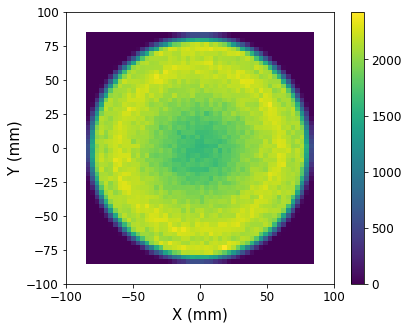

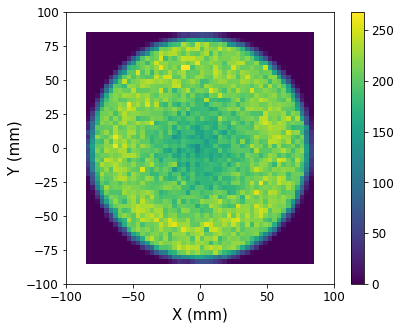

In [13]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['X'],df['Y'],weights=df['Weight'],bins=(50,50))
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]
    savename=f"Phase2_e_{fieldsize}norm.png"
    fig.savefig(savename)

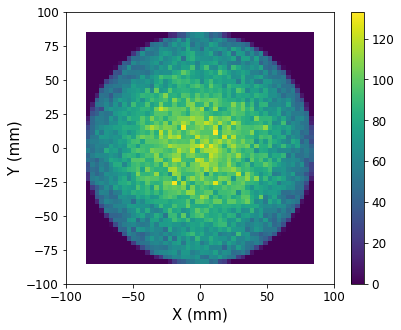

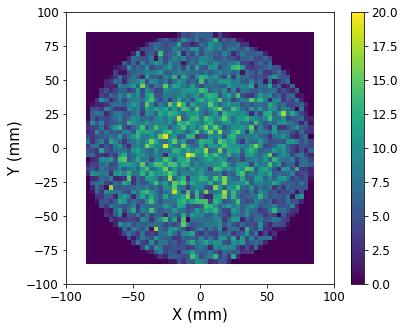

In [14]:
for files_g in filenames_e:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict_e[files_g]
    _=plt.hist2d(df['X'],df['Y'],weights=df['Weight'],bins=(50,50))
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.colorbar()
    plt.show()
#     fieldsize=files_g.split('_')[1]
#     savename=f"Phase2_e_{fieldsize}norm.png"
#     fig.savefig(savename)

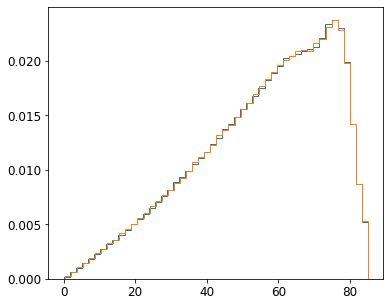

In [22]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

for files_g in filenames_g:
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=ax.hist(df['XY'],weights=df['Weight'],density="True",histtype='step',bins=50)

#     plt.xlabel('XY (mm)')
#     plt.colorbar()
plt.show()
#     fieldsize=files_g.split('_')[1]

#     savename=f"Phase2_e_{fieldsize}XthetaX.png"
#     fig.savefig(savename)

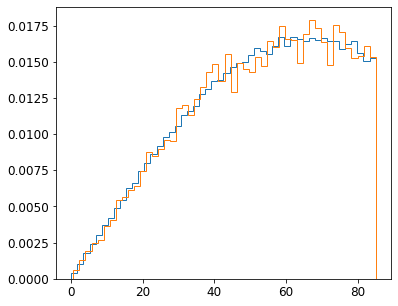

In [23]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

for files_g in filenames_e:
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict_e[files_g]
    _=ax.hist(df['XY'],weights=df['Weight'],density="True",histtype='step',bins=50)

#     plt.xlabel('XY (mm)')
#     plt.colorbar()
plt.show()
#     fieldsize=files_g.split('_')[1]

#     savename=f"Phase2_e_{f

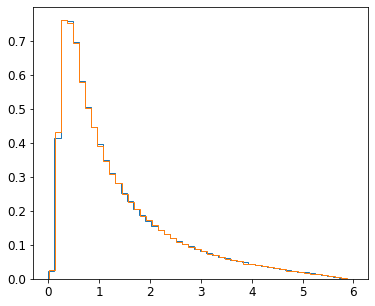

In [24]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

for files_g in filenames_g:
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=ax.hist(df['Ekine'],weights=df['Weight'],density="True",histtype='step',bins=50)

#     plt.xlabel('XY (mm)')
#     plt.colorbar()
plt.show()

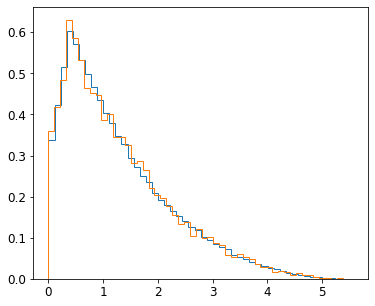

In [18]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

for files_g in filenames_e:
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict_e[files_g]
    _=ax.hist(df['Ekine'],weights=df['Weight'],histtype='step',bins=50,density=True)

#     plt.xlabel('XY (mm)')
#     plt.colorbar()
plt.show()

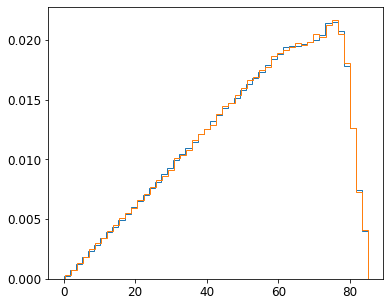

In [25]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

for files_g in filenames_g:
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=ax.hist(df['XY'],weights=df['Weight']*df["Ekine"],density=True,histtype='step',bins=50)

#     plt.xlabel('XY (mm)')
#     plt.colorbar()
plt.show()

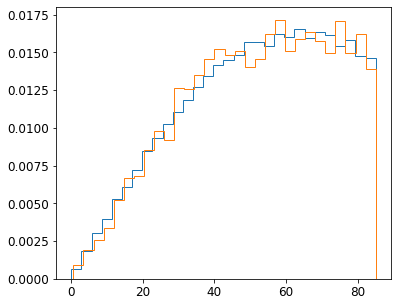

In [20]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

for files_g in filenames_e:
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict_e[files_g]
    _=ax.hist(df['XY'],weights=df['Weight']*df["Ekine"],histtype='step',bins=30,density=True)

#     plt.xlabel('XY (mm)')
#     plt.colorbar()
plt.show()

KeyboardInterrupt: 

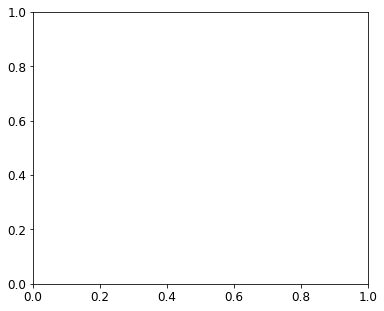

In [21]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

for files_g in filenames_g:
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=ax.hist(df['thetaXY'],histtype='step',bins=100)

#     plt.xlabel('XY (mm)')
#     plt.colorbar()
plt.show()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

for files_g in filenames_e:
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict_e[files_g]
    _=ax.hist(df['thetaXY'],weights=df['Weight'],histtype='step',bins=50,density=True)

#     plt.xlabel('XY (mm)')
#     plt.colorbar()
plt.show()

In [ ]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(10,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['XY'],df['thetaXY'],norm=mplcol.LogNorm(),bins=(350,350))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
#     plt.xlabel('X (mm)')
#     plt.ylabel(r'$\theta_{\rm{X}}$ ($^{\circ}$)')


    plt.colorbar(norm='log')
    plt.show()
#     fieldsize=files_g.split('_')[1]

#     savename=f"Phase2_e_{fieldsize}XthetaX.png"
#     fig.savefig(savename)

In [ ]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(10,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['Ekine'],df['thetaXY'],norm=mplcol.LogNorm(),bins=(350,350))


    plt.colorbar(norm='log')
    plt.show()

In [ ]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['X'],df['thetaX'],bins=(50,50))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('X (mm)')
    plt.ylabel(r'$\theta_{\rm{X}}$ ($^{\circ}$)')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]

    savename=f"Phase2_e_{fieldsize}XthetaX.png"
    fig.savefig(savename)

In [ ]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['X'],df['thetaY'],bins=(50,50))#,vmax=8100
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('X (mm)')
    plt.ylabel(r'$\theta_{\rm{Y}}$ (deg)')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]

    savename=f"Phase2_e_{fieldsize}XthetaY.png"
    fig.savefig(savename)

In [ ]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['Y'],df['thetaY'],bins=(50,50))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('Y (mm)')
    plt.ylabel(r'$\theta_{\rm{Y}}$')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]

    savename=f"Phase2_e_{fieldsize}YthetaY.png"
    fig.savefig(savename)


In [ ]:
for files_g in filenames_g:
    fig,ax=plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['Y'],df['thetaX'],bins=(50,50))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('Y (mm)')
    plt.ylabel(r'$\theta_{\rm{Y}}$')
    plt.colorbar()
    plt.show()
    fieldsize=files_g.split('_')[1]

    savename=f"Phase2_e_{fieldsize}YthetaX.png"
    print(savename)
    fig.savefig(savename)


In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(6,5))
    df=data_frame_dict[files_g]
    
    _=plt.hist2d(df['X'],df['dX'],bins=(100,100))
    #using _ just suppresses the output of plt.hist2d
    plt.xlim(-80,80)
    plt.ylim(-0.8,0.8)
    plt.colorbar()
    plt.show()


In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Ekine'],density=True,histtype='step',bins=(80),label=files_g[30:-33])
#         print(f"{midpoints(y)} and x {x}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()
fig.savefig("Phase2_Ekine_all.png")


    

In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(6,5))
    # creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['X'],df['Y'],bins=(50,50),weights=df['Weight'],vmax=6000)
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()


In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(8,4))
    df=data_frame_dict[files_g]
    
    _=plt.hist2d(df['X'],df['dX'],weights=df['Weight'],bins=(100,100),vmax=3050)
    #using _ just suppresses the output if plt.hist2d
    plt.xlim(-80,80)
    plt.ylim(-0.8,0.8)
    plt.colorbar()
    plt.show()


In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(8,4))
    df=data_frame_dict[files_g]
    _=plt.hist2d(df['Ekine'],df['dX'],weights=df['Weight'],bins=(300,50))
#     plt.xlim(-80,80)
#     plt.ylim(-0.7,0.7)
    plt.colorbar()
    plt.show()


In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['X'],histtype='step',bins=(80),label=files_g[30:-33])
#         print(f"{midpoints(y)} and x {x}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()


    

In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Y'],histtype='step',bins=(80),label=files_g[30:-33])
#         print(f"{midpoints(y)} and x {x}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()


In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Y'],histtype='step',bins=(80),label=files_g[30:-33])
        y,x,_=plt.hist(df['X'],histtype='step',bins=(80),label=files_g[30:-33])
#         print(f"{midpoints(y)} and x {x}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1.2)
plt.show()

In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
        df=data_frame_dict[files_g]
        y,x,_=plt.hist(df['Ekine'],density=True,histtype='step',bins=(80),label=files_g[30:-33])
#         print(f"{midpoints(y)} and x {x}")

# plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
plt.ylim(0.001,1.2)
plt.show()

for j,yi in enumerate(y):
    print(f"/gate/source/mybeam/gps/hist/point {x[j]:.4f} {y[j]*1000:.2f}")
    
    
    

In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:

        _=plt.hist(data_frame_dict[files_g]['X'],weights=data_frame_dict[files_g]['Weight'],histtype='step',bins=(80),label=files_g[30:-13])

plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()


In [ ]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:

    _=plt.hist(data_frame_dict[files_g]['dX'][data_frame_dict[files_g]['X']<40][data_frame_dict[files_g]['X']>30],histtype='step',bins=(80),label=files_g[30:-13])

plt.yscale('log')
plt.legend(loc="upper left")
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()


In [ ]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PhS1AB_Gamma_Params/output-PhS_bias100_3.root",\
            "/work/lb8075/PhaseSpaces/PhS1AB_Gamma_Params/output-PhS_bias1_3.root"
]


In [ ]:

data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine','ProductionVolume','CreatorProcess'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is



In [ ]:
for files_g in filenames_g:
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    print(data_frame_dict[files_g].groupby('ProductionVolume')['Weight'].sum())


In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(19,4))
# creating a temporary dataframe to hold the one we're currently interating over
    df=data_frame_dict[files_g]
    np2=df['CreatorProcess'].to_numpy(dtype="str")
    np3=df['Weight'].to_numpy(dtype="float16")
    np2=np2.astype('str')
    print(np2.dtype)
    print(np3.dtype)

# plt.hist(df['ProductionVolume'])
# print(df.dtypes)
# df['ProductionVolume']=df['ProductionVolume'].astype('str')
# print(df.dtypes)

#     df['Weight'].astype('float16')
# print(df.dtypes)

# print(df2)
# _=plt.hist(df3)
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.colorbar()
# plt.show()
# df2=df['ProductionVolume']
# print(df['ProductionVolume'].dtypes)
# df['ProductionVolume']=df['ProductionVolume'].astype('str')
# print(df['ProductionVolume'].dtypes)

#     df['CreatorProcess'].value_counts().plot(kind='bar',logy=True, ylim=(1,5500000))
    plt.hist2d(np2,np3)

## Inspecting phase 1A

In [ ]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root",\
            "/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias1_3.root"
]

#ran 10x more bias 1 than bias 100

In [ ]:
data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine','ParticleName','ProductionVolume','CreatorProcess'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is



In [ ]:
for files_g in filenames_g:
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    print(data_frame_dict[files_g].groupby('ProductionVolume')['Weight'].sum())


In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(10,5))
    print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    df=data_frame_dict[files_g]
    df['CreatorProcess']=df['CreatorProcess'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
    (df['CreatorProcess'][df['Weight']>0.5]).value_counts().plot(kind='bar')
    

In [ ]:
plt.subplots(1,1,figsize=(10,5))
print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
df['ProductionVolume']=df['ProductionVolume'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
(df['ParticleName'][df['Weight']<0.5]).value_counts().plot(kind='bar',logy=True,ylim=(1,10000000))
                   
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(10,5))
    print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    df=data_frame_dict[files_g]
    df['ProductionVolume']=df['ProductionVolume'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
    (df['ParticleName'][df['Weight']>0.5]).value_counts().plot(kind='bar',logy=True,ylim=(1,10000000))
    

In [ ]:
plt.subplots(1,1,figsize=(7,3))
print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
df['ProductionVolume']=df['ProductionVolume'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
(df['ProductionVolume'][df['Weight']<0.5]).value_counts().plot(kind='bar',sort_columns=True)
    
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(7,3))
    print(files_g)
#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    df=data_frame_dict[files_g]
    df['ProductionVolume']=df['ProductionVolume'].astype("str")

#     df['Weight'][df['Weight']<0.5].plot(kind='bar')
#     (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar')
    (df['ProductionVolume'][df['Weight']>0.5]).value_counts().plot(kind='bar',sort_columns=True)
    

In [ ]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(10,5))

#     print(data_frame_dict[files_g]['ProductionVolume'].value_counts())
    df=data_frame_dict[files_g]
#     df['ProductionVolume']=df['ProductionVolume'].astype("str")

    df['Weight'].hist()

In [ ]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['X'].count())

In [ ]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['Weight'].value_counts())

In [ ]:
for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    if j==0:
        col="cyan"
    else:
        col="magenta"
    plt.hist(df['X'],density=True,weights=df['Weight'],histtype='step',color=col)

In [ ]:
for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    if j==0:
        col="cyan"
    else:
        col="magenta"
    plt.hist(df['Ekine'],density=True,weights=df['Weight'],histtype='step',color=col)

In [ ]:
for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    if j==0:
        col="cyan"
    else:
        col="magenta"
    plt.hist(df['X'][df['Y']<1],density=True,weights=df['Weight'][df['Y']<1],histtype='step',color=col)

In [ ]:
for j,files_g in enumerate(filenames_g):
    plt.subplots(1,1,figsize=(6,5))

    df=data_frame_dict[files_g]

    plt.hist2d(df['X'][df['ParticleName']==b'gamma'],df['Y'][df['ParticleName']==b'gamma'],weights=df['Weight'][df['ParticleName']==b'gamma'],bins=(60,60))

In [ ]:
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
dfsubgamma=df[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df['Weight']>0.5][df['ParticleName']==b"gamma"]
dfsubgamma["ProductionVolume"].value_counts().plot(kind='bar',logy=True)

In [ ]:
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
df
# dfsubgamma=df[df['CreatorProcess']==b'eBrem']
# dfsubgamma

In [ ]:
dfsubgamma=df[df['ProductionVolume']==b'target_log'][df['Weight']>0.5][df['ParticleName']==b'gamma']
dfsubgamma

In [ ]:
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
dfsubelec=df[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df['Weight']>0.5][df['ParticleName']==b"e-"]
dfsubelec["ProductionVolume"].value_counts().plot(kind='bar')

In [ ]:
pd.set_option('display.max_rows',1000)


In [ ]:
df1=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias1_3.root"]
dfsubgamma=df1[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df1['ParticleName']==b"gamma"]
dfsubgamma["ProductionVolume"].value_counts().plot(kind='bar',logy=True)


In [ ]:
# plt.subplots(1,1,figsize=(15,10))

for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    dfsubgamma=df[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df['ParticleName']==b"gamma"]
    # dfsubgamma["ProductionVolume"].value_counts().plot(kind='bar',logy=True)
    print(dfsubgamma.groupby('ProductionVolume')['Weight'].value_counts())
    print("")

In [ ]:
plt.subplots(1,1,figsize=(10,4))
df["ProductionVolume"][df['ParticleName']==b"gamma"].hist(histtype='bar', weights=df['Weight'][df['ParticleName']==b"gamma"])

In [ ]:
df=data_frame_dict["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-1A_bias100_3.root"]
dfsubgamma=df[["ProductionVolume","CreatorProcess","ParticleName","Weight"]][df['ParticleName']==b"gamma"]
# dfsubgamma["ProductionVolume"].value_counts().plot(kind='bar',logy=True)[df['ParticleName']==b"gamma"]
df["ProductionVolume"][df['ParticleName']==b"gamma"].hist(histtype='bar', weights=df['Weight'][df['ParticleName']==b"gamma"])

In [ ]:
plt.subplots(1,1,figsize=(15,10))

for j,files_g in enumerate(filenames_g):
    df=data_frame_dict[files_g]
    print(files_g)
    if j==0:
        col="cyan"
        factor=10
    else:
        col="magenta"
        factor=1
    df["ProductionVolume"][df['ParticleName']==b"gamma"].hist(histtype='step',log=True, weights=factor*df['Weight'][df['ParticleName']==b"gamma"],color=col)

In [ ]:
filenames_g=[
            "/work/lb8075/PhaseSpaces/PhS1AB_Gamma_ZeroBias/output-PhS_bias1_76.root"
]

In [ ]:
data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','dZ','Weight','Ekine','ProductionVolume','CreatorProcess'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is


In [ ]:
for j,files_g in enumerate(filenames_g):

    df=data_frame_dict[files_g]
    data_frame_dict[files_g]['dXdY']=(data_frame_dict[files_g].dX**2+data_frame_dict[files_g].dY**2)**0.5
    ratioThetaXY=data_frame_dict[files_g].dXdY/data_frame_dict[files_g].dZ
    ratioThetaX=data_frame_dict[files_g].dX/data_frame_dict[files_g].dZ
    ratioThetaY=data_frame_dict[files_g].dX/data_frame_dict[files_g].dZ
    data_frame_dict[files_g]['thetaXY']=ratioThetaXY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaX']=ratioThetaX.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['thetaY']=ratioThetaY.apply(math.atan)*180/3.14
    data_frame_dict[files_g]['XY']=(data_frame_dict[files_g].X**2+data_frame_dict[files_g].Y**2)**0.5


In [ ]:
for j,files_g in enumerate(filenames_g):
    plt.subplots(1,1,figsize=(6,5))

    df=data_frame_dict[files_g]

    plt.hist2d(df['X'],df['Y'],weights=df['Weight'],bins=(60,60))
    plt.colorbar()

In [ ]:
for j,files_g in enumerate(filenames_g):
    plt.subplots(1,1,figsize=(6,5))

    df=data_frame_dict[files_g]

    _=plt.hist2d(df['X'][df['Y']<10][df['Y']>-10],df['thetaX'][df['Y']<10][df['Y']>-10],weights=df['Weight'][df['Y']<10][df['Y']>-10],bins=(200,200))
    plt.ylim(-30,30)
    plt.colorbar()

In [ ]:
for j,files_g in enumerate(filenames_g):
    plt.subplots(1,1,figsize=(6,5))

    df=data_frame_dict[files_g]

    _=plt.hist2d(df['XY'],df['thetaXY'],weights=df['Weight'],bins=(100,200))
    plt.ylim(-20,0)
    plt.colorbar()